In [925]:
#todo: I found here some mistakes in the code, needs to be fixed

# approximation of linear line (line we gonna predict)

# What we need to calculate?: We need to train the model on the training data so that we find the best weights and the best bias. With these values kept from training we can actually then insert unknown data x and ŷ will be calculated with already trained weights and bias

# ŷ = wx + b

# ŷ: predicted value of line
# w: weight (slope/angle of line)
# b: bias (shift of line, offset, meaning how far the line is)

In [926]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [927]:
# load data using sklearn make regression method
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = X+100
y = y-1000

In [928]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [929]:
print(X)

[[100.93128012]
 [100.08704707]
 [ 98.94228907]
 [100.31424733]
 [ 99.52082576]
 [100.64768854]
 [ 99.53658231]
 [100.54256004]
 [100.61167629]
 [101.0035329 ]
 [100.8219025 ]
 [101.53803657]
 [100.73846658]
 [ 99.78032811]
 [ 99.1915064 ]
 [100.09176078]
 [ 98.04032988]
 [100.51326743]
 [101.03099952]
 [ 97.3802549 ]
 [100.49671415]
 [100.09707755]
 [ 99.53427025]
 [100.91540212]
 [101.56464366]
 [101.46564877]
 [ 99.39936131]
 [ 99.96417396]
 [ 99.39829339]
 [ 98.80379338]
 [100.35711257]
 [100.37569802]
 [100.26105527]
 [ 99.4702398 ]
 [ 99.09197592]
 [100.19686124]
 [ 99.70099265]
 [100.36163603]
 [100.82254491]
 [ 99.70830625]
 [100.36139561]
 [ 99.323078  ]
 [101.52302986]
 [ 99.48172978]
 [ 99.76584663]
 [ 99.60789185]
 [ 99.6988963 ]
 [ 99.35488025]
 [100.32875111]
 [100.2088636 ]
 [ 99.67233785]
 [100.00511346]
 [ 99.76586304]
 [101.47789404]
 [ 99.61491772]
 [100.34361829]
 [100.33126343]
 [ 99.81434102]
 [ 99.76541287]
 [ 98.01243109]
 [100.32408397]
 [ 99.7742237 ]
 [ 98.89

In [930]:
print(y)

[ -937.312798   -1023.76398073 -1025.68676582  -992.06354346
 -1015.47549454  -963.90604123 -1040.79420109 -1010.82303923
  -978.58529301  -977.20137788  -962.77564807  -910.43287094
  -958.44887176  -984.98170689 -1061.87551793  -978.59633326
 -1089.10957316  -981.32108893  -985.76577446 -1126.70386499
  -987.17693374  -998.43052405 -1039.29179595  -981.0504209
  -915.87934051  -932.02578843  -996.96721369  -993.00569341
 -1042.72871243 -1074.26807854  -974.33452825  -956.63763695
  -999.36257205 -1021.27317252 -1049.39610818 -1016.24026614
 -1027.9165108   -999.92850289  -931.53397124  -984.329103
  -969.51540258 -1034.74528828  -939.74827615 -1019.75786057
 -1005.4750429   -995.45560239 -1015.7871471  -1049.53656945
  -966.73396694  -991.09891681  -998.13598263  -985.58437389
 -1050.21943287  -883.62263324  -965.29050377  -964.77978229
  -973.81988297  -990.80158132 -1007.94234764 -1087.75520361
  -959.19464803 -1009.57175421 -1042.68297889 -1038.35371326
 -1067.93155851  -944.76087

In [931]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

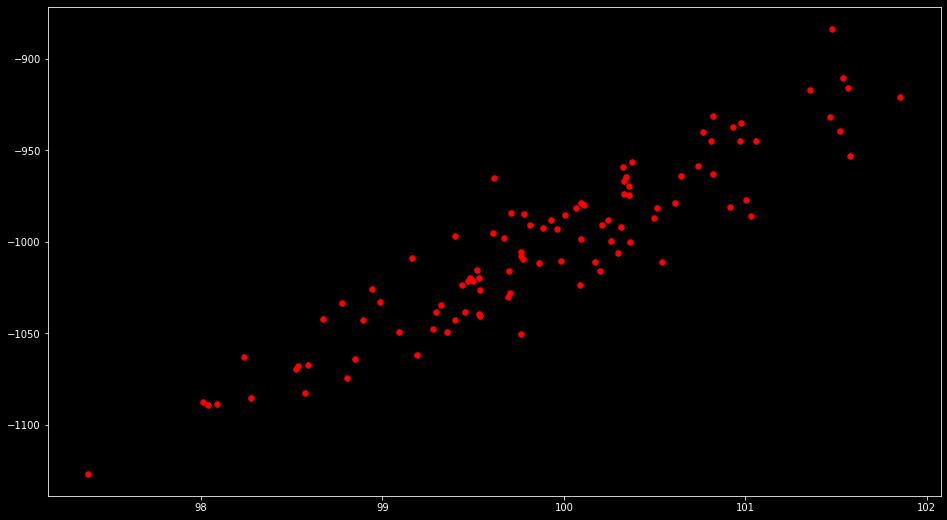

In [932]:
# visualise
plt.figure(figsize=(16, 9))
plt.style.use("dark_background")
plt.scatter(X, y, color="r", s=30)
plt.show()

In [933]:
import math

class LinearRegression:
    def __init__(self, lr=0.01, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.bias = None
        self.weight = None

    def fit(self, X, y):
        # initialize parameters (here with zeros)
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)  #[0]
        self.bias = 0  # scalar

        
        # gradient descent loop
        for iteration in range(self.n_iterations):

            # calculate current iteration of line based on current weights and bias

            # Why does np.dot() return an array instead of a scalar here?
            # It is because we inputted X, which holds feature vectors. (Just a reminder, in each vector there is only one element here). Weights is this time only an array which holds one scalar value. Numpy operations are done on complete arrays, so it will multiply each element of X with the scalar value of weights. So the resulting array will hold result of each vector from X with weight + bias.
            # Also for info, vectors will usually contain more than one element, so I suspect that you have to also have corresponding number of weights. So if you have 3 elements in vector, you will have 3 weights. This is because you have to multiply each element of vector with corresponding weight. We also see this confirmed above, where np.zeros() takes n_features as parameter. 
            y_predicted = np.dot(X, self.weight) + self.bias  # ŷ = xw + b
            
            
            # calculate new weights
            # w = w - learning_rate * derivative_of_weight
            # derivative_w = 1/n_samples * sum(dotproduct(y_predicted - y_actual)) 
            # derivative_of_weight:
            derivative_weight = (2 / n_samples) * np.sum(np.dot(X.T, (y_predicted - y)))

            # subtract old weight with learning rate * derivative_of_weight  
            self.weight -= self.lr * derivative_weight  

            # calculate new bias (similar formula as above except sum instead of dot product)
            # derivative of bias
            derivative_bias = (1 / n_samples) * np.sum(y_predicted - y)
            # derivative_bias = np.sum(y_predicted-y) / n_samples

            self.bias -= self.lr * derivative_bias
            
            # plot each iteration of y_predicted from initialization to best fit
            if iteration % 10 == 0:
                plt.plot(X_train, y_predicted)
            if iteration == self.n_iterations - 1:
                plt.plot(X_train, y_predicted, color="blue")

    def predict(self, X):
        return np.dot(X, self.weight) + self.bias


C:\Users\lazni\AppData\Local\Temp\ipykernel_3188\2098062620.py:35: RuntimeWarning: invalid value encountered in subtract
  self.weight -= self.lr * derivative_weight


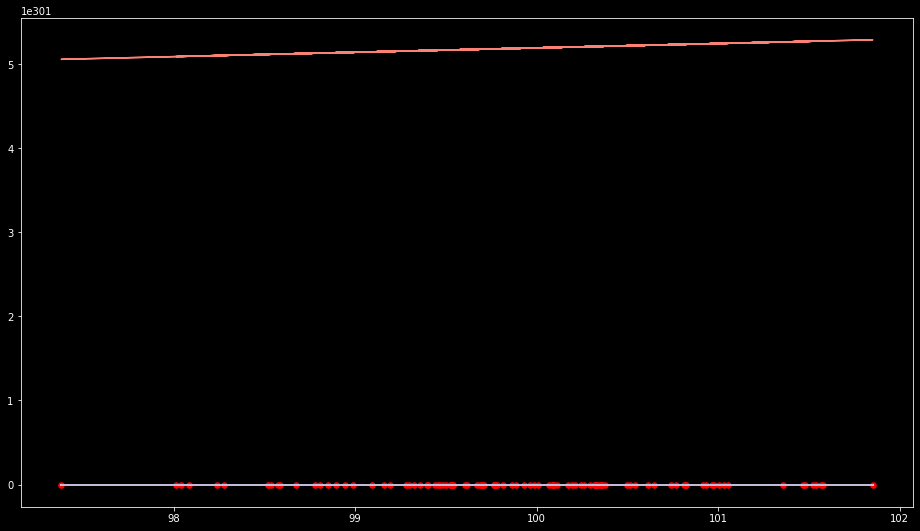

In [934]:
plt.figure(figsize=(16, 9))
plt.scatter(X, y, color="r", s=30)
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

# you can check below how the line gets iteratively from completely horizontal position to position
# that best fits the training data (blue)

In [935]:
# HOW DOT PRODUCT WORKS

A = np.array([[1], [3]])
B = np.array([50])
# If working with vectors that have only one element, you only need to just multiply them.
# result1 = 1 * 50
# result2 = 3 * 50
result = np.dot(A, B)
print(result)

C = np.array([[1, 2], [3, 4]])
D = np.array([[5, 6], [7, 8]])
# Array C:
# [[1 2]
#  [3 4]]
# Array D:
# [[5 6]
#  [7 8]]
# To perform dot product on matrix, you have to rotate the first matrix by 90 degrees and multiply the elements of both matrices. Imagine as if the left matrix is moving to the right and the columns are multiplying with columns of the right matrix, one column at a time.
# [[3 1]   -> [[5 6]
#  [4 2]]  ->  [7 8]]
# Therefore:
# 1*5 + 2*7 = 19 (first column of C with first column of D)
# 1*6 + 2*8 = 22 (first column of C with second column of D)
# 3*5 + 4*7 = 43 (second column of C with first column of D)
# 3*6 + 4*8 = 50 (second column of C with second column of D)
# Therefore:
# (1⋅5+2⋅7) (1⋅6+2⋅8)
# (3⋅5+4⋅7) (3⋅6+4⋅8)
# Therefore:
# [[19 22]
#  [43 50]]

result = np.dot(C, D)
print(result)


[ 50 150]
[[19 22]
 [43 50]]


In [936]:
print(A.shape)
print(X.shape)

(2, 1)
(100, 1)


In [937]:
print(predicted)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [938]:
# cost function mean squared error
def mse(y_true, y_pred):
    return np.mean(y_true - y_pred) ** 2

In [939]:
mse_value = mse(y_test, predicted)
print("squared error", mse_value)

squared error nan


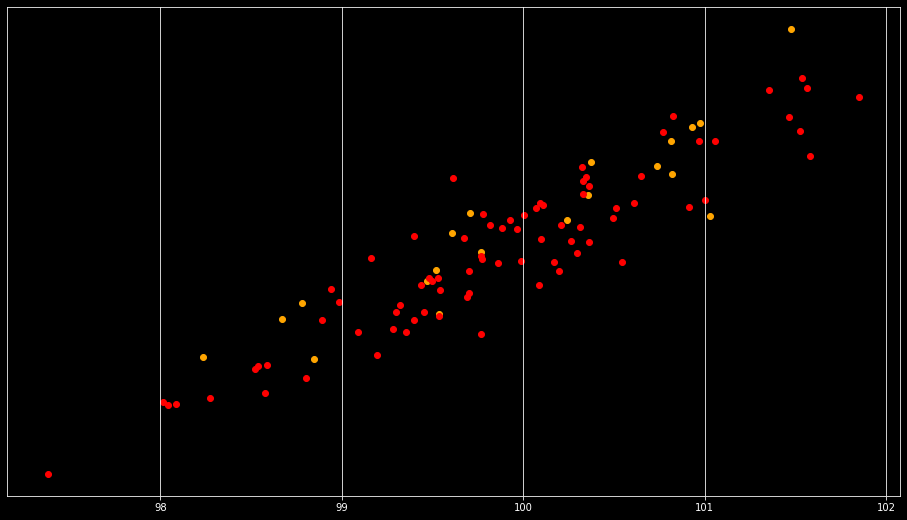

In [940]:
# check how predicted line fits on all data from X
y_pred_line = regressor.predict(X)

plt.figure(figsize=(16, 9))
plt.grid()
plt.yticks(ticks=list(range(-100, 110, 10)))
plt.scatter(X_test, y_test, color="orange")
plt.scatter(X_train, y_train, color="red")
plt.plot(X, y_pred_line, color="white")
plt.show()

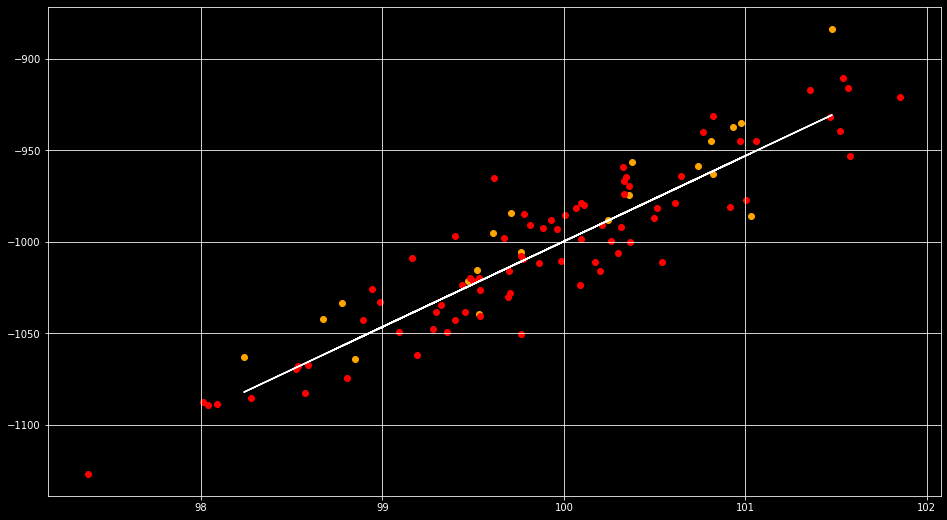

In [941]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

plt.figure(figsize=(16, 9))
plt.grid()
plt.scatter(X_test, y_test, color="orange")
plt.scatter(X_train, y_train, color="red")
plt.plot(X_test, predicted, color="white")